#### The epsilon-greedy approach selects the action with the highest estimated reward most of the time. The aim is to have a balance between exploration and exploitation. Exploration allows us to have some room for trying new things, sometimes contradicting what we have already learned.

#### With a small probability of $\epsilon$, we choose to explore, i.e., not to exploit what we have learned so far. In this case, the action is selected randomly, independent of the action-value estimates.



#### How can we find which slot machine has highest win rate given that we don't have any information about those slot machines

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class BanditArm:
    def __init__(self, p):
        # p: the win rate
        # P_estimate: the estimate of the win rate
        # N is the number of observations we collected so far
        self.p = p
        self.p_estimate = 0
        self.N = 0

    def pull(self):
        # Win or Lose after you pull the slot machine
        return np.random.random() < self.p

    def update(self, x):
        # formula to use for estimate win rate
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
        

In [151]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]        



def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    
    payments = [[], [], []]
    
    num_times_explored = 0
    
    num_times_exploited = 0
    
    num_optimal = 0
    
    optimal_j = np.argmax([b.p for b in bandits]) + 1
    
    print("optimal j:", optimal_j, '\n')

    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        
        if np.random.random() < EPS:
        # the explore part, randomly select a bandit
        # j can be 0, 1, 2
        
            num_times_explored += 1
            j = np.random.randint(len(bandits))
            
        else:
        # exploit part, select the bandot with the 
        # maximum estimate probability
            
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j + 1 == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        # get the rewards 
        x = bandits[j].pull()

        # update rewards log
        
        rewards[i] = x
        
        payments[j].append(x) 

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    

  # print mean estimates for each bandit
    for idx, b in enumerate(bandits):
        print("mean estimate:", b.p_estimate)

        # print total reward
        print("total reward earned:", sum(payments[idx]))
        print("overall win rate:", sum(payments[idx]) / len(payments[idx]))
        print("num_times_explored:", len(payments[idx]))
#         print("num_times_exploited:", num_times_exploited)
#         print("num times selected optimal bandit:", num_optimal)

        # plot the results
        cumulative_rewards = np.cumsum(payments[idx])
        
        win_rates = cumulative_rewards / (np.arange(len(payments[idx])) + 1)
        plt.figure(figsize=(8,6))
        
        plt.title('Explore and Exploit for Bandit '+ str(idx+1))
        
        plt.plot(win_rates)
        
        plt.plot(np.ones(len(payments[idx]))*BANDIT_PROBABILITIES[idx])
        
        plt.show()
        
    print("number of time explore suboptimal bandits (1 & 2):", num_times_explored)
    print("number of times exploited given current available information:", num_times_exploited)
    print('Each bandit occupies 3.33% of the time to explore other time to choose given the best available information')

optimal j: 3 

mean estimate: 0.20705882352941177
total reward earned: 88
overall win rate: 0.20705882352941177
num_times_explored: 425


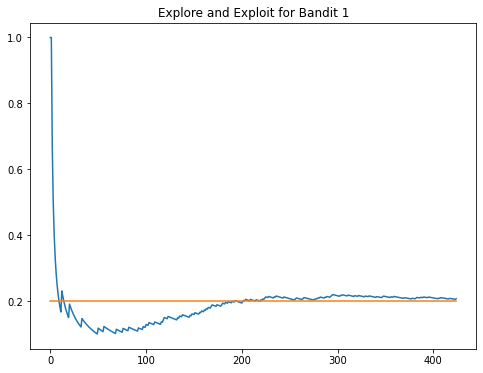

mean estimate: 0.5056179775280902
total reward earned: 180
overall win rate: 0.5056179775280899
num_times_explored: 356


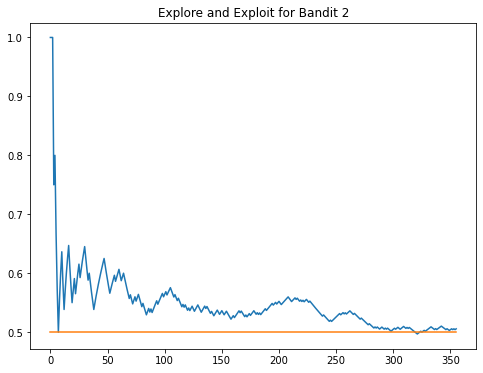

mean estimate: 0.7556134070940448
total reward earned: 6966
overall win rate: 0.7556134070940449
num_times_explored: 9219


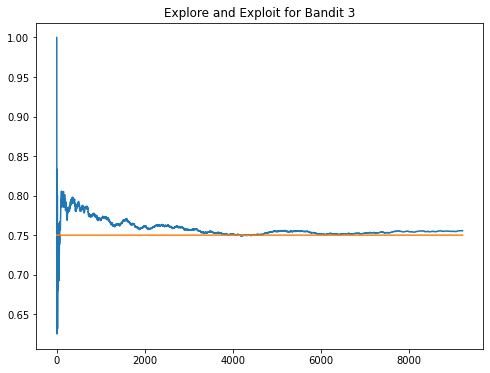

number of time explore suboptimal bandits (1 & 2): 1054
number of times exploited given current available information: 8946
Each bandit occupies 3.33% of the time to explore other time to choose given the best available information


In [152]:
if __name__ == "__main__":
    experiment()